<hr>
<div style="background-color: lightgray; padding: 20px; color: black;">
<div>
<img src="https://th.bing.com/th/id/R.3cd1c8dc996c5616cf6e65e20b6bf586?rik=09aaLyk4hfbBiQ&riu=http%3a%2f%2fcidics.uanl.mx%2fwp-content%2fuploads%2f2016%2f09%2fcimat.png&ehk=%2b0brgMUkA2BND22ixwLZheQrrOoYLO3o5cMRqsBOrlY%3d&risl=&pid=ImgRaw&r=0" style="float: right; margin-right: 30px;" width="200"/> 
<font size="6.9" color="8C3061"><b>Curso de Optimización</b></font> <br>
<font size="4.5" color="8C3061"><b>Tarea 4 - Método de Newton</b></font> 
</div>
<div style="text-align: left">  <br>
Edison David Serrano Cárdenas. <br>
MSc en Matemáticas Aplicadas <br>
CIMAT - Sede Guanajuato <br>
</div>

</div>
<hr>


# <font color="8C3061" >**Cargar Librerías**</font> 

In [1]:
# load libraries
import numpy as np
from typing import Tuple, Callable

# load module Opti_functions
from opti_functions import Opti_functions as opti

# load visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

---

# <font color="8C3061" >**Ejercicio 1 (2.0 puntos)**</font>

Para cada función $f(\mathbf{x})$ calcule de manera analítica la Hessiana  
y en cada caso programe la función recibe un punto $\mathbf{x}$ y devuelve 
$\nabla^2 f(\mathbf{x})$.

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$


**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$
   

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$

**Función de Hartmann de dimensión 6 ([Referencia](https://www.sfu.ca/~ssurjano/hart6.html)):** 
Para $\mathbf{x}=(x_1,x_2, ..., x_6)$

$$ f(\mathbf{x}) = -\frac{1}{1.94} \left[ 2.58 + 
\sum_{i=1}^{4} \alpha_i \exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right)\right],$$
donde
$$ \alpha = (1.0, 1.2, 3.0, 3.2)$$
$$ \mathbf{A} = [a_{ij}] = \begin{bmatrix}
10   &   3 &   17 & 3.5 & 1.7 &  8 \\
0.05 &  10 &   17 & 0.1 & 8   & 14 \\
3    & 3.5 & 1.7  & 10  & 17  & 8  \\
17   & 8   & 0.05 & 10  & 0.1 & 14
\end{bmatrix}, \quad
\mathbf{P} = [p_{ij}] = 10^{-4} \begin{bmatrix}
1312 & 1696 & 5569 &  124 & 8283 & 5886 \\
2329 & 4135 & 8307 & 3736 & 1004 & 9991 \\
2348 & 1451 & 3522 & 2883 & 3047 & 6650 \\
4047 & 8828 & 8732 & 5743 & 1091 & 381
\end{bmatrix}.
$$ 

Esta función tiene 6 óptimos locales. El óptimo global es 
$\mathbf{x}_* = (0.20169, 0.15001,  0.476874, 0.275332, 0.311652, 0.6573)$,
y $f(\mathbf{x}_*) = -3.0424$.

*NOTA:* Para esta función necesita calcular el gradiente y programar esta función
para usarla en los siguientes ejercicios.


<b>Solución:</b>



<div class="alert alert-block alert-info">
<b>Nota:</b> Para el cálculo de la función Hessiana vamos a usar el lenguaje de programación <i><b>Wolfram Mathematica</b></i>. Se presentará una imagen para cada función en el que se cálcule la Hessiana por este medio y además, se copiara el código en una celda de Markdown para que se pueda copiar y reproducir en <a href="https://www.wolframcloud.com/">https://www.wolframcloud.com/</a> si se tiene cuenta.  </div>


## Función de Himmelblau:
Cálculo de la matriz Hessiana:
<center>
<img src="./images/Himmelblau_hess.png" 
     style="float: center; margin-right: 30px;" 
     width="1000"
     />
</center>


Código de *Wolfram Mathematica*

```mathematica
fncHimmelblau[x_,y_]:= (x^2 + y - 11)^2 + (x + y^2 - 7)^2;
Expand[ResourceFunction["HessianMatrix"][fncHimmelblau[x,y], {x,y}]]//MatrixForm
```



In [2]:
def hess_himmelblau(x:np.ndarray)->np.ndarray:
    x1 = x[0]
    x2 = x[1]
    hess = np.array([[12*x1**2 + 4*x2 - 42, 4*x1 + 4*x2],
                     [4*x1 + 4*x2, 4*x1 + 12*x2**2 - 26]])
    return hess

## Función de Beale:
Cálculo de la matriz Hessiana:
<center>
<img src="./images/Beale_hess.png"
     style="float: center; margin-right: 30px;" 
     width="1000"
     />
</center>


Código de *Wolfram Mathematica*

```mathematica
fncBeale[x_,y_]:= (1.5-x+x*y)^2+(2.25-x+x*y^2)^2+(2.625-x+x*y^3)^2;
Expand[ResourceFunction["HessianMatrix"][fncBeale[x,y], {x,y}]]//MatrixForm
```



In [3]:
def hess_beale(x:np.ndarray)->np.ndarray:
    return [[6 - 4*x[1] - 2*x[1]**2 - 4*x[1]**3 + 2*x[1]**4 + 2*x[1]**6, 
             3 - 4*x[0] + 9.*x[1] - 4*x[0]*x[1] + 15.75*x[1]**2 - 12*x[0]*x[1]**2 + 8*x[0]*x[1]**3 + 12*x[0]*x[1]**5],
            [3 - 4*x[0] + 9.*x[1] - 4*x[0]*x[1] + 15.75*x[1]**2 - 12*x[0]*x[1]**2 + 8*x[0]*x[1]**3 + 12*x[0]*x[1]**5,
             9*x[0] - 2*x[0]**2 + 31.5*x[0]*x[1] - 12*x[0]**2*x[1] + 12*x[0]**2*x[1]**2 + 30*x[0]**2*x[1]**4]]

## Función de Rosenbrock:
Cálculo de la matriz Hessiana:
<center>
<img src="./images/Rossenbrock_hess.png"
     style="float: center; margin-right: 30px;" 
     width="1000"
     />
</center>


Código de *Wolfram Mathematica*

```mathematica
fncRosenbrock[x_List] := Total[100*(Rest[x] - Most[x]^2)^2 + (1 - Most[x])^2]
HessianMatrix[fnc_, vars_List] := Outer[D[fnc, #1, #2] &, vars, vars]
vars =Table[Subscript[x,i],{i,1,6}]; (* Define the list of variables *)
Expand[HessianMatrix[fncRosenbrock[vars], vars]]//MatrixForm
```



In [4]:
def hess_Rosenbrock(x:np.ndarray)->np.ndarray:
    n = len(x)
    hess = np.zeros((n,n))
    hess[0,0] = 1200*x[0]**2 - 400*x[1] + 2
    for i in range(1,n-1):
        hess[i,i] = 202 + 1200*x[i]**2 - 400*x[i+1]
        hess[i,i-1] = -400*x[i-1]
        hess[i-1,i] = -400*x[i-1]
    hess[-1,-1] = 200
    hess[-2,-1] = -400*x[-2]
    hess[-1,-2] = -400*x[-2]
    return hess

## Función de Hartmann

Definamos el vector $\alpha$, y las matrices $A$ y $P$

In [5]:
alpha_Hartmann = [1.0, 1.2, 3.0, 3.2]
A_Hartmann = np.array([[10, 3, 17, 3.5, 1.7, 8],
                [0.05, 10, 17, 0.1, 8, 14],
                [3, 3.5, 1.7, 10, 17, 8],
                [17, 8, 0.05, 10, 0.1, 14]])
P_Hartmann = 1e-4 * np.array([[1312, 1696, 5569, 124, 8283, 5886],
                        [2329, 4135, 8307, 3736, 1004, 9991],
                        [2348, 1451, 3522, 2883, 3047, 6650],
                        [4047, 8828, 8732, 5743, 1091, 381]])

$$ f(\mathbf{x}) = -\frac{1}{1.94} \left[ 2.58 + 
\sum_{i=1}^{4} \alpha_i \exp\left(-\sum_{j=1}^{6}a_{ij}(x_j-p_{ij})^2 \right)\right]$$

Esta función se puede expresar como:

$$ f(\mathbf{x}) = c\left[ 2.58 + 
\sum_{i=1}^{4} \alpha_i \exp\left(-\langle a[i],(x-p[i])^2\rangle \right)\right]$$

Donde $a[i]$ y $p[i]$ representan la fila $i-$ésima de $A$ y $P$, y la constante $c=-\frac{1}{1.94}$.

In [6]:
def fncHartmann(x:np.ndarray)->float:
    sum_term = 0
    for i in range(4):
        sum_term += alpha_Hartmann[i] * np.exp(-np.sum(A_Hartmann[i] * (x - P_Hartmann[i])**2))
    return -1 / 1.94 * (2.58 + sum_term)

El gradiente de la función de Hartmann es:

$$\nabla f(\mathbf{x}) = c\sum_{i=1}^4 -2\alpha_i\exp\left(-\langle a[i],(x-p[i])^2\rangle \right)(x-P[i])*a[i] $$

donde, $u*v = (u_1v_1,\cdots,u_nv_n)$.

In [7]:
def grad_fncHartmann(x:np.ndarray)->np.ndarray:
    
    grad = np.zeros(6)
    
    for i in range(4):
        grad += 2 * alpha_Hartmann[i] * (P_Hartmann[i] - x) * A_Hartmann[i] * np.exp(-np.sum(A_Hartmann[i] * (x - P_Hartmann[i])**2))
    return -1 / 1.94 * grad

A su vez la matriz Hessiana es:

$$\left[\nabla^2f(\mathbf{x})\right]_{i,j}=\left\{\begin{array}{lr}
c \sum_{k=1}^4\left[4 \alpha_k a_{k j} a_{k j}\left(x_j-p_{k j}\right)^2-2 \alpha_k a_{k j}\right] \exp\left(-\langle a[k],(x-p[k])^2\rangle \right) & \text {  si } i=j \\
c \sum_{k=1}^4\left[4 \alpha_k a_{k j} a_{k i}\left(x_j-p_{k j}\right)\left(x_i-p_{k i}\right)\right] \exp\left(-\langle a[k],(x-p[k])^2\rangle \right) & \text {   si } i \neq j
\end{array}\right.
$$

Por tanto,

In [8]:
def hess_Hartmann(x:np.ndarray)->np.ndarray:
    
    hess = np.zeros((6,6))
    for k in range(4):
        phi = np.exp(-np.sum(A_Hartmann[k] * (x - P_Hartmann[k])**2))
        hess += phi * (4*alpha_Hartmann[k]*np.outer(A_Hartmann[k] * (x - P_Hartmann[k]), A_Hartmann[k] * (x - P_Hartmann[k])))
        hess -= 2*alpha_Hartmann[k]*np.diag(A_Hartmann[k] * phi)
    return -1 / 1.94 * hess

EL siguiente código de *Wolfram Mathematica* puede ser usado para verificar que las definiciones en Python de las funciones gradiente y hessiana de la función de Hartmann coinciden con las calculadas por este medio.

```mathematica
hartmannFunction[x_List] := Module[{\[Alpha], A, P},
    \[Alpha] = {1.0, 1.2, 3.0, 3.2};
    A = {{10, 3, 17, 3.5, 1.7, 8},
         {0.05, 10, 17, 0.1, 8, 14},
         {3, 3.5, 1.7, 10, 17, 8},
         {17, 8, 0.05, 10, 0.1, 14}};
    P = (10^-4) {{1312, 1696, 5569, 124, 8283, 5886},
                 {2329, 4135, 8307, 3736, 1004, 9991},
                 {2348, 1451, 3522, 2883, 3047, 6650},
                 {4047, 8828, 8732, 5743, 1091, 381}};
    -1/1.94 (2.58 + 
        Sum[\[Alpha][[i]] Exp[-Total[A[[i]] (x - P[[i]])^2]], {i, 4}]
    )
]
HessianMatrix[fnc_, vars_List] := Outer[D[fnc, #1, #2] &, vars, vars]

gradHartmann[u_List]:=(Grad[hartmannFunction[vars],vars])/. Thread[vars ->u]
hessHartmann[u_List]:=(HessianMatrix[hartmannFunction[vars],vars])/. Thread[vars ->u]


Print["fncHadamart[0] =",hartmannFunction[{1,0,0,0,0,1}]]
Print["gradHadamart[0]=\n",gradHartmann[{0,0,0,0,0,0}]]
Print["hessHadamart[0]=\n",hessHartmann[{0,0,0,0,0,0}]//TableForm]
```



---

# Ejercicio 2 (2 puntos)

Programe el método de Newton "puro" (Algoritmo 1 de la Clase 10).

1. La función que implementa el algoritmo 
   calcula la dirección de Newton resolviendo el sistema 
   de ecuaciones $\mathbf{H}_k \mathbf{p}_k^N = - \mathbf{g_k}$.
   No use la factorización de Cholesky porque no hay garantía 
   de que la matriz sea definida positiva, y justo queremos 
   ver como se comporta el algoritmo.
- Si la dimensión $n$ de la variable $\mathbf{x}$ es 2, defina un
  arreglo $\mathbf{M}$  en el que se guarde los puntos $\mathbf{x}_0, \mathbf{x}_1,
  ..., \mathbf{x}_k$ generados. Si $n>2$, devolve $\mathbf{M}$ como $None$.
- La función debe devolver el último valor $k$, $\mathbf{x}_k$, 
  $\mathbf{g}_k$,  $\mathbf{M}$.

2. Pruebe el algoritmo usando la cantidad de iteraciones máximas $N=1000$ y la tolerancia 
   $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina,
   y los puntos iniciales siguientes:
   

**Función de Himmelblau** 
- $\mathbf{x}_0 = (2,4)$


**Función de Beale**
- $\mathbf{x}_0 = (2,3)$  


**Función de Rosenbrock**
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{10}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{20}$ 


**Función de Hartmann de dimensión 6**
- $\mathbf{x}_0 = (0,0,0,0,0,0)$ 


En cada caso imprima los resultados:
- El número de iteraciones realizadas $k$
- El punto $\mathbf{x}_k$ obtenido
- $f(\mathbf{x}_k)$
- $\|\nabla f(\mathbf{x}_k)\|$
- La variable que indica si el algoritmo terminó porque se cumplió el criterio de paro o no.
- Si $n=2$, genere la gráfica de los contornos de nivel de la función y la trayectoria
  de los puntos $\mathbf{x}_0, \mathbf{x}_1, ..., \mathbf{x}_k$.

<b>Solución:</b>

1. *Implementación del Método de Newton:*

In [9]:
def newton_method(f:Callable[[np.ndarray],float], 
                  grad:Callable[[np.ndarray],np.ndarray], 
                  hess:Callable[[np.ndarray],np.ndarray], 
                  x0:np.ndarray, 
                  tol:float, 
                  max_iter:int)->Tuple[int,np.ndarray,np.ndarray,bool,np.ndarray]:

    """Newton's method for finding the minimum of a function
    
    :param f: function to minimize (Callable[[np.ndarray],float])
    :param grad: gradient of the function (Callable[[np.ndarray],np.ndarray])
    :param hess: Hessian of the function (Callable[[np.ndarray],np.ndarray])
    :param x0: initial guess (np.ndarray)
    :param tol: tolerance for the stopping criterion (float)
    :param max_iter: maximum number of iterations (int)
    :return: number of iterations, approximate minimum of the function, gradient of the function at x, success, sequence of iterates generated by the method (Tuple[int,np.ndarray,np.ndarray,bool,np.ndarray])
    """
    
    n = len(x0)
    x = x0
    
    if n==2:
        seq_points = np.array([x])
    
    for k in range(max_iter):
        grad_x = grad(x)
        if np.linalg.norm(grad_x) < tol:
            if n==2:
                return k, x, grad_x, True, seq_points
            else:
                return k, x, grad_x, True, None
        
        hess_x = hess(x)
        pk = np.linalg.solve(hess_x, -grad_x)
        x = x + pk
        if n==2:
            seq_points = np.vstack((seq_points, x))
    
    print('Newton method did not converge')
    if n==2:
        return max_iter, x, grad_x, False, seq_points
    else:
        return max_iter, x, grad_x, False, None

2. Evaluación del rendimiento del algoritmo:

### Función de Himmelblau

Valor inicial: $\mathbf{x}_0 = (2,4)$

Himmelblau function

Valor inicial x0	: [2. 4.]
Número de iteraciones	: 6
xk			: [3. 2.]
f(xk)			: 7.394064262118014e-23
||grad_f(x_k)|| 	: 6.758096355951128e-11
Convergencia		: True


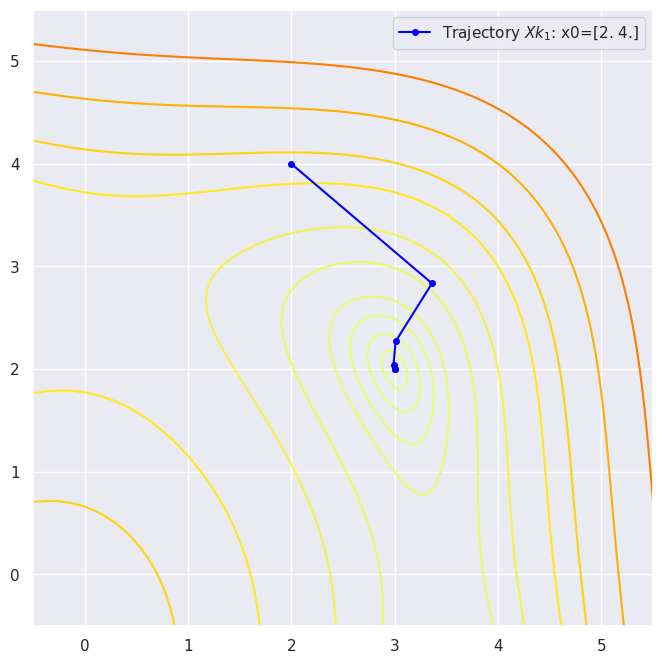

In [10]:
max_iter = 1000
x0 = np.array([2.0,4.0])
tol = np.sqrt(len(x0)*np.finfo(float).eps)


k1, xk1, grad_x1, conv1, list_xk1 = newton_method(opti.fncHimmelblau, opti.grad_fncHimmelblau, hess_himmelblau, x0, tol, max_iter) 

print("Himmelblau function\n")

print("Valor inicial x0\t:",x0)
print("Número de iteraciones\t:",k1)
print("xk\t\t\t:",xk1)
print("f(xk)\t\t\t:",opti.fncHimmelblau(xk1))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x1))
print("Convergencia\t\t:",conv1)

opti.contornosFnc2D(opti.fncHimmelblau, xleft=-0.5, xright=5.5, ybottom=-0.5, ytop=5.5,
               levels=[0.5,2, 5, 10, 25, 50, 100, 150, 250, 400],list_xk1=list_xk1, )

### Función de Beale
Valor inicial: $\mathbf{x}_0 = (2,3)$  


Beale function

Valor inicial x0	: [2. 3.]
Número de iteraciones	: 10
xk			: [2.8858668e-13 1.0000000e+00]
f(xk)			: 14.203125
||grad_f(x_k)|| 	: 8.01518971676611e-12
Convergencia		: True


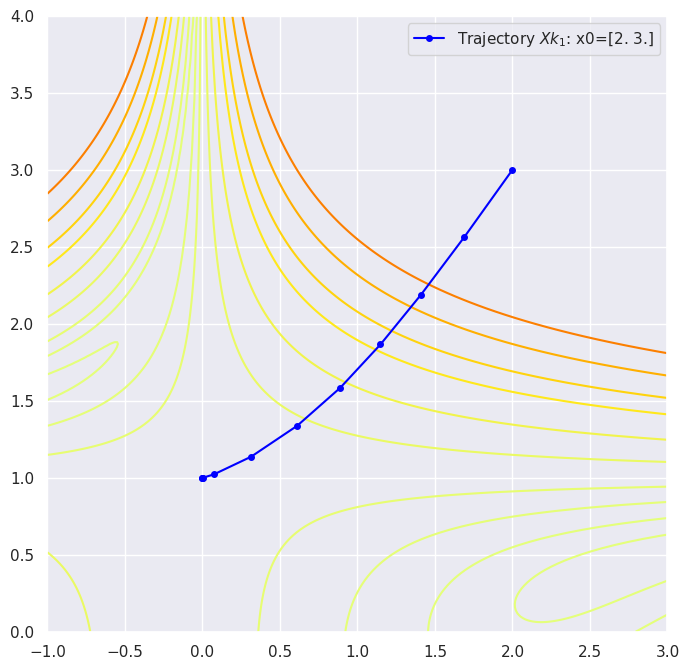

In [11]:
max_iter = 1000
x0 = np.array([2.0,3.0])
tol = np.sqrt(len(x0)*np.finfo(float).eps)


k2, xk2, grad_x2, conv2, list_xk2 = newton_method(opti.fncBeale, opti.grad_fncBeale, hess_beale, x0, tol, max_iter) 

print("Beale function\n")

print("Valor inicial x0\t:",x0)
print("Número de iteraciones\t:",k2)
print("xk\t\t\t:",xk2)
print("f(xk)\t\t\t:",opti.fncBeale(xk2))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x2))
print("Convergencia\t\t:",conv2)

opti.contornosFnc2D(opti.fncBeale, xleft=-1, xright=3, ybottom=0, ytop=4,
               levels=[0.5,2, 5, 10, 25, 50, 100, 150, 250, 400],list_xk1=list_xk2, )

### Función de Rosenbrock:
Valores iniciales:
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{10}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{20}$ 

Rosenbrock function

Valor inicial x0	: [-1.2  1. ]
Número de iteraciones	: 6
xk			: [1. 1.]
f(xk)			: 3.432687326755789e-20
||grad_f(x_k)|| 	: 8.285755243355701e-09
Convergencia		: True


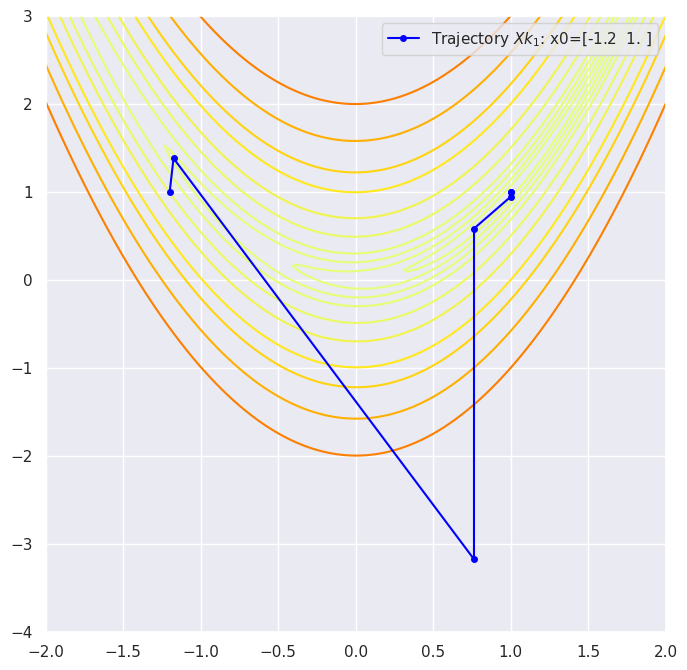

In [12]:
max_iter = 1000
x0 = np.array([-1.2,1.0])
tol = np.sqrt(len(x0)*np.finfo(float).eps)


k3, xk3, grad_x3, conv3, list_xk3 = newton_method(opti.fncRosenbrock, opti.grad_fncRosenbrock, hess_Rosenbrock, x0, tol, max_iter) 

print("Rosenbrock function\n")

print("Valor inicial x0\t:",x0)
print("Número de iteraciones\t:",k3)
print("xk\t\t\t:",xk3)
print("f(xk)\t\t\t:",opti.fncRosenbrock(xk3))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x3))
print("Convergencia\t\t:",conv3)

opti.contornosFnc2D(opti.fncRosenbrock, xleft=-2, xright=2, ybottom=-4, ytop=3,
               levels=[0.5,2, 5, 10, 25, 50, 100, 150, 250, 400],list_xk1=list_xk3, )

In [13]:
max_iter = 1000
x0 = np.array([-1.2,1.0]*5)
tol = np.sqrt(len(x0)*np.finfo(float).eps)


k4, xk4, grad_x4, conv4, list_xk4 = newton_method(opti.fncRosenbrock, opti.grad_fncRosenbrock, hess_Rosenbrock, x0, tol, max_iter) 

print("Rosenbrock function\n")

print("Valor inicial x0\t:",x0)
print("Número de iteraciones\t:",k4)
print("xk\t\t\t:",xk4)
print("f(xk)\t\t\t:",opti.fncRosenbrock(xk4))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x4))
print("Convergencia\t\t:",conv4)

max_iter = 1000
x0 = np.array([-1.2,1.0]*10)
tol = np.sqrt(len(x0)*np.finfo(float).eps)

k5, xk5, grad_x5, conv5, list_xk5 = newton_method(opti.fncRosenbrock, opti.grad_fncRosenbrock, hess_Rosenbrock, x0, tol, max_iter)

print("\n\nValor inicial x0\t:",x0)
print("Número de iteraciones\t:",k5)
print("xk\t\t\t:",xk5)
print("f(xk)\t\t\t:",opti.fncRosenbrock(xk5))  
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x5))
print("Convergencia\t\t:",conv5)

Rosenbrock function

Valor inicial x0	: [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ]
Número de iteraciones	: 34
xk			: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
f(xk)			: 4.212788404816373e-26
||grad_f(x_k)|| 	: 2.7148701115017567e-13
Convergencia		: True


Valor inicial x0	: [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1. ]
Número de iteraciones	: 46
xk			: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
f(xk)			: 2.1336222295899554e-29
||grad_f(x_k)|| 	: 9.735332936353381e-14
Convergencia		: True


### Función de Hartmann de dimensión 6
Valor inicial: $\mathbf{x}_0 = (0,0,0,0,0,0)$ 

In [14]:
max_iter = 1000
x0 = np.zeros(6)
tol = np.sqrt(len(x0)*np.finfo(float).eps)

k6, xk6, grad_x6, conv6, list_xk6 = newton_method(fncHartmann, grad_fncHartmann, hess_Hartmann, x0, tol, max_iter)

print("Hartmann function\n")

print("Valor inicial x0\t:",x0)
print("Número de iteraciones\t:",k6)
print("xk\t\t\t:",xk6)
print("f(xk)\t\t\t:",fncHartmann(xk6))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x6))
print("Convergencia\t\t:",conv6)

Hartmann function

Valor inicial x0	: [0. 0. 0. 0. 0. 0.]
Número de iteraciones	: 14
xk			: [-0.19076654 -0.13889587 -0.19177065 -0.24983657 -0.2596438  -0.54614109]
f(xk)			: -1.329896908066998
||grad_f(x_k)|| 	: 2.4640892308492742e-08
Convergencia		: True


---

# <font color="8C3061" >**Ejercicio 3 (3.0 puntos)**</font>

Modifique la función que implementa el método de Newton del Ejercicio 2 
para incluir el cálculo del tamaño de paso (Newton amortiguado).

1. Además de los parámetros que se mencionan en el Algoritmo 1, la
   función que implementa el método debe recibir los parámetros
   del algoritmo de backtracking: $\rho>0$, $c_1>0$ y el número de
   iteraciones máximas $N_b$. Fijamos el valor inicial $\alpha_{ini}=1$ 
   para el algoritmo de backtracking para intentar dar el paso completo
   como lo hace el método de Newton, pero 
   si ese paso no satisface la condición de descenso, dejamos que lo recorte.
   
   No tenemos garantizado que la matriz Hessiana $\mathbf{H}_k$ sea
   definida positiva, así que agregamos los siguientes pasos al algoritmo
   después de calcular la dirección $\mathbf{p}_k$:
- Si $\mathbf{g}_k^\top\mathbf{p}_k>0$, hacer $\mathbf{p}_k = -\mathbf{p}_k$
  para que sea dirección de descenso.
- Calcular $\alpha_k$ usando el algoritmo de backtracking.
- Calcular $\mathbf{x}_{k+1} = \mathbf{x}_{k} + \alpha_k \mathbf{p}_{k}$.
   

2. Pruebe el algoritmo usando los puntos iniciales del Ejercicio 2, 
   fijando la cantidad de iteraciones máximas $N=1000$, la tolerancia 
   $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina.
   Para el algoritmo de backtracking use $\rho=0.5, c_1=0.1$ y $N_b=500$.
   
   Imprima los mismos datos que se piden en el Ejercicio 2 para 
   que pueda comparar los resultados
   
<b>Solución:</b>

> Nota: Los parámetros de backtracking están definidas de forma predeterminada en la función "damped_newton_method"

1. Implementación del método de Newton amortiguado: 

In [15]:
def damped_newton_method(f:Callable[[np.ndarray],float],
                            grad:Callable[[np.ndarray],np.ndarray],
                            hess:Callable[[np.ndarray],np.ndarray],
                            x0:np.ndarray,
                            tol:float,
                            max_iter:int,
                            rho:float=0.5,
                            c:float=0.1,
                            max_iterb:int=500)->Tuple[int,np.ndarray,np.ndarray,bool,np.ndarray]:
    """Damped Newton's method for finding the minimum of a function
    
    :param f: function to minimize (Callable[[np.ndarray],float])
    :param grad: gradient of the function (Callable[[np.ndarray],np.ndarray])
    :param hess: Hessian of the function (Callable[[np.ndarray],np.ndarray])
    :param x0: initial guess (np.ndarray)
    :param tol: tolerance for the stopping criterion (float)
    :param max_iter: maximum number of iterations (int)
    :param rho: parameter for the backtracking line search (float)
    :param c: parameter for the backtracking line search (float)
    :param max_iterb: maximum number of iterations for the backtracking line search (int)
    :return: number of iterations, approximate minimum of the function, gradient of the function at x, success, sequence of iterates generated by the method (Tuple[int,np.ndarray,np.ndarray,bool,np.ndarray])
    """
    
    n = len(x0)
    x = x0
    
    if n==2:
        seq_points = np.array([x])
    
    for k in range(max_iter):
        grad_x = grad(x)
        if np.linalg.norm(grad_x) < tol:
            if n==2:
                return k, x, grad_x, True, seq_points
            else:
                return k, x, grad_x, True, None
        
        hess_x = hess(x)
        pk = np.linalg.solve(hess_x, -grad_x)

        if np.dot(grad_x, pk) >0:
            pk = -pk
        
        alpha, _ = opti.back_tracking(alpha_init=1,rho=rho,c=c, 
                                     xk=x, f=f, fk = f(x), 
                                     grad_fk = grad_x,
                                     dir_pk=pk, iter_maxb=max_iterb)
        
        x = x + alpha*pk
        
        if n==2:
            seq_points = np.vstack((seq_points, x))
    
    print('Damped Newton method did not converge')
    if n==2:
        return max_iter, x, grad_x, False, seq_points
    else:
        return max_iter, x, grad_x, False, None


2. Evaluación del rendimiento del algoritmo:

### Función de Himmelblau

Valor inicial: $\mathbf{x}_0 = (2,4)$

Himmelblau function

Valor inicial x0	: [2. 4.]
Número de iteraciones	: 6
xk			: [3. 2.]
f(xk)			: 7.394064262118014e-23
||grad_f(x_k)|| 	: 6.758096355951128e-11
Convergencia		: True


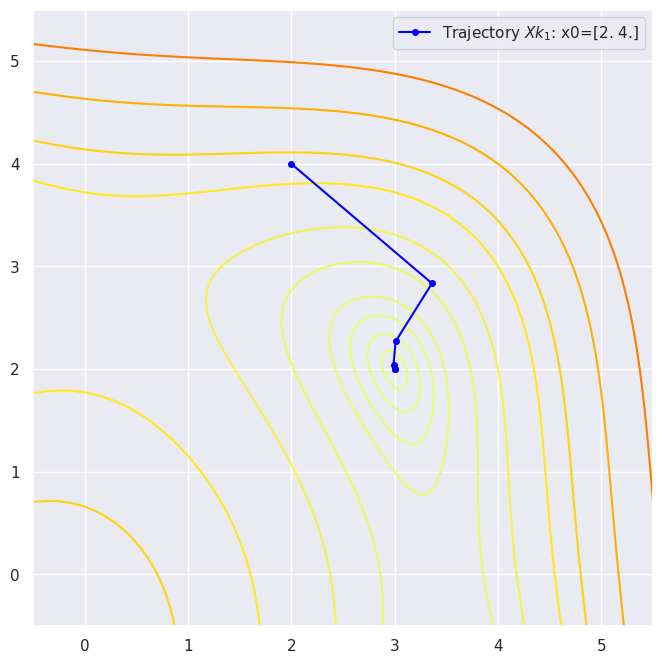

In [16]:
max_iter = 1000
x0 = np.array([2.0,4.0])
tol = np.sqrt(len(x0)*np.finfo(float).eps)


k1, xk1, grad_x1, conv1, list_xk1 = damped_newton_method(opti.fncHimmelblau, opti.grad_fncHimmelblau, hess_himmelblau, x0, tol, max_iter) 

print("Himmelblau function\n")

print("Valor inicial x0\t:",x0)
print("Número de iteraciones\t:",k1)
print("xk\t\t\t:",xk1)
print("f(xk)\t\t\t:",opti.fncHimmelblau(xk1))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x1))
print("Convergencia\t\t:",conv1)

opti.contornosFnc2D(opti.fncHimmelblau, xleft=-0.5, xright=5.5, ybottom=-0.5, ytop=5.5,
               levels=[0.5,2, 5, 10, 25, 50, 100, 150, 250, 400],list_xk1=list_xk1, )

### Función de Beale
Valor inicial: $\mathbf{x}_0 = (2,3)$  

Beale function

Valor inicial x0	: [2. 3.]
Número de iteraciones	: 10
xk			: [2.8858668e-13 1.0000000e+00]
f(xk)			: 14.203125
||grad_f(x_k)|| 	: 8.01518971676611e-12
Convergencia		: True


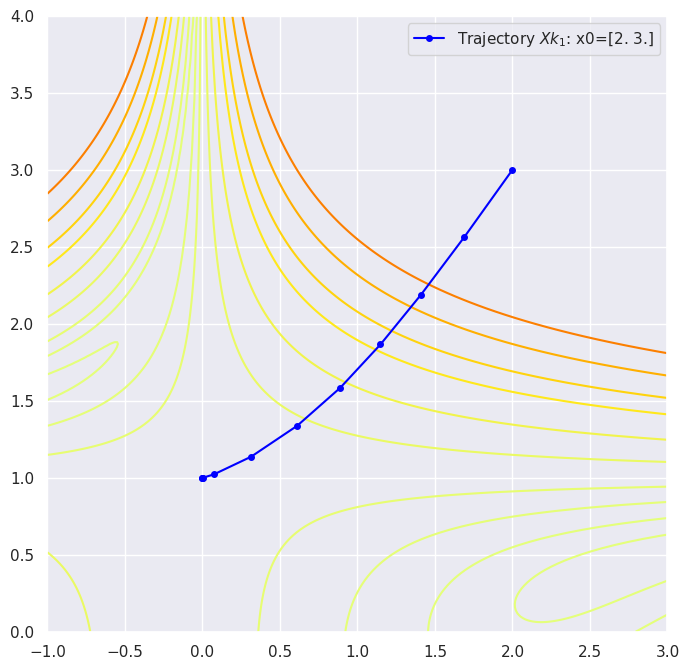

In [27]:
max_iter = 1000
x0 = np.array([2.0,3.0])
tol = np.sqrt(len(x0)*np.finfo(float).eps)


k2, xk2, grad_x2, conv2, list_xk2 = damped_newton_method(opti.fncBeale, opti.grad_fncBeale, hess_beale, x0, tol, max_iter) 

print("Beale function\n")

print("Valor inicial x0\t:",x0)
print("Número de iteraciones\t:",k2)
print("xk\t\t\t:",xk2)
print("f(xk)\t\t\t:",opti.fncBeale(xk2))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x2))
print("Convergencia\t\t:",conv2)

opti.contornosFnc2D(opti.fncBeale, xleft=-1, xright=3, ybottom=0, ytop=4,
               levels=[0.5,2, 5, 10, 25, 50, 100, 150, 250, 400],list_xk1=list_xk2, )

### Función de Rosenbrock:
Valores iniciales:
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{10}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{20}$ 

Rosenbrock function

Valor inicial x0	: [-1.2  1. ]
Número de iteraciones	: 21
xk			: [1. 1.]
f(xk)			: 7.682025128905186e-24
||grad_f(x_k)|| 	: 1.216666330197071e-10
Convergencia		: True


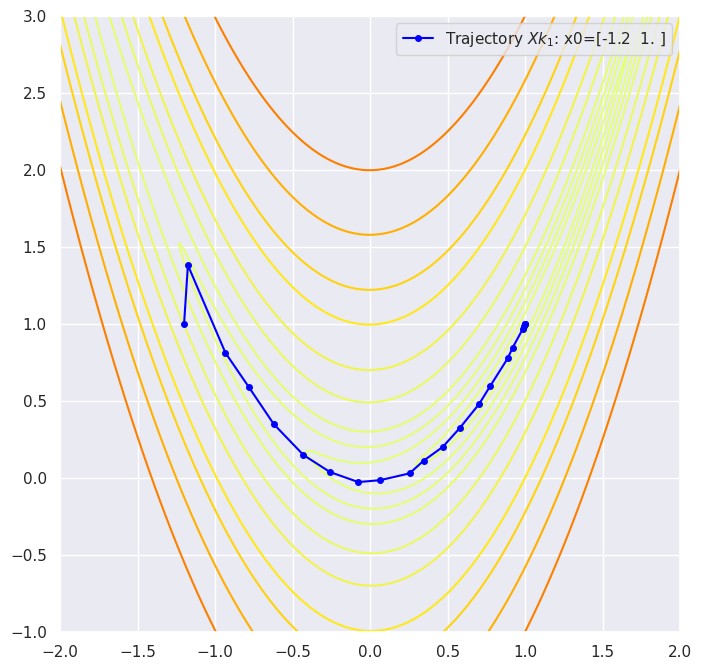

In [18]:
max_iter = 1000
x0 = np.array([-1.2,1.0])
tol = np.sqrt(len(x0)*np.finfo(float).eps)


k3, xk3, grad_x3, conv3, list_xk3 = damped_newton_method(opti.fncRosenbrock, opti.grad_fncRosenbrock, hess_Rosenbrock, x0, tol, max_iter) 

print("Rosenbrock function\n")

print("Valor inicial x0\t:",x0)
print("Número de iteraciones\t:",k3)
print("xk\t\t\t:",xk3)
print("f(xk)\t\t\t:",opti.fncRosenbrock(xk3))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x3))
print("Convergencia\t\t:",conv3)

opti.contornosFnc2D(opti.fncRosenbrock, xleft=-2, xright=2, ybottom=-1, ytop=3,
               levels=[0.5,2, 5, 10, 25, 50, 100, 150, 250, 400],list_xk1=list_xk3, )

In [19]:
max_iter = 1000
x0 = np.array([-1.2,1.0]*5)
tol = np.sqrt(len(x0)*np.finfo(float).eps)


k4, xk4, grad_x4, conv4, list_xk4 = damped_newton_method(opti.fncRosenbrock, opti.grad_fncRosenbrock, hess_Rosenbrock, x0, tol, max_iter) 

print("Rosenbrock function\n")

print("Valor inicial x0\t:",x0)
print("Número de iteraciones\t:",k4)
print("xk\t\t\t:",xk4)
print("f(xk)\t\t\t:",opti.fncRosenbrock(xk4))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x4))
print("Convergencia\t\t:",conv4)

max_iter = 1000
x0 = np.array([-1.2,1.0]*10)
tol = np.sqrt(len(x0)*np.finfo(float).eps)
k5, xk5, grad_x5, conv5, list_xk5 = damped_newton_method(opti.fncRosenbrock, opti.grad_fncRosenbrock, hess_Rosenbrock, x0, tol, max_iter)

print("\n\nValor inicial x0\t:",x0)
print("Número de iteraciones\t:",k5)
print("xk\t\t\t:",xk5)
print("f(xk)\t\t\t:",opti.fncRosenbrock(xk5))  
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x5))
print("Convergencia\t\t:",conv5)

Rosenbrock function

Valor inicial x0	: [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ]
Número de iteraciones	: 38
xk			: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
f(xk)			: 9.313298010015087e-26
||grad_f(x_k)|| 	: 6.055875434061535e-12
Convergencia		: True


Valor inicial x0	: [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1. ]
Número de iteraciones	: 51
xk			: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
f(xk)			: 2.1192310481670416e-20
||grad_f(x_k)|| 	: 9.403901373987576e-10
Convergencia		: True


### Función de Hartmann de dimensión 6
Valor inicial: $\mathbf{x}_0 = (0,0,0,0,0,0)$ 

In [20]:
max_iter = 1000
x0 = np.zeros(6)
tol = np.sqrt(len(x0)*np.finfo(float).eps)

k6, xk6, grad_x6, conv6, list_xk6 = damped_newton_method(fncHartmann, grad_fncHartmann, hess_Hartmann, x0, tol, max_iter)

print("Hartmann function\n")

print("Valor inicial x0\t:",x0)
print("Número de iteraciones\t:",k6)
print("xk\t\t\t:",xk6)
print("f(xk)\t\t\t:",fncHartmann(xk6))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x6))
print("Convergencia\t\t:",conv6)

Hartmann function

Valor inicial x0	: [0. 0. 0. 0. 0. 0.]
Número de iteraciones	: 9
xk			: [0.20168951 0.15001069 0.47687397 0.27533243 0.31165162 0.65730053]
f(xk)			: -3.042457737843049
||grad_f(x_k)|| 	: 1.626960911272132e-08
Convergencia		: True



---

# <font color="8C3061" >**Ejercicio 4 (3.0 puntos)**</font>

Programe el método de Newton con modificación de los eigenvalores 
de la Hessiana de acuerdo al Algoritmo 4 de la Clase 11.

1. Además de los parámetros que se mencionan en el Algoritmo 4, la
   función que implementa el método debe recibir los parámetros
   del algoritmo de backtracking: $\rho>0$, $c_1>0$ y el número de
   iteraciones máximas $N_b$. Fijamos el valor inicial $\alpha_{ini}=1$ 
   para el algoritmo de backtracking para intentar dar el paso completo.
   
- Puede usar la función [eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)
  de la librería Numpy para calcular la descomposión espectral de 
  la Hessiana $\mathbf{H}_k$ y a partir de ésta calcular la Hessiana modificada.


2. Pruebe el algoritmo usando la cantidad de iteraciones máximas $N=1000$, la tolerancia 
   $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina,
   $\delta = 0.005$, para backtracking  use $\rho=0.5, c_1=0.1$ y $N_b=500$
   y los puntos iniciales del Ejercicio 2.
   
   Imprima los mismos datos que se piden en el Ejercicio 2 para 
   que pueda comparar los resultados.
   
3. ¿Hay alguna ventaja de este algoritmo comparado con los implementados
   en los ejercicios 1 y 2, o basta con usar alguno de los anteriores?
   
<b>Solución:</b>

1. Implementación del método de newton con matriz Hessiana modificada

In [21]:
def newton_method_mod_hess(f: Callable[[np.ndarray], float],
                           grad: Callable[[np.ndarray], np.ndarray],
                            hess: Callable[[np.ndarray], np.ndarray],
                            x0: np.ndarray,
                            tol: float,
                            max_iter: int,
                            delta: float = 0.005,
                            rho: float = 0.5,
                            c: float = 0.1,
                            max_iterb: int = 500)->Tuple[int, np.ndarray, np.ndarray, bool, np.ndarray]:
    """ Modified Newton's method for finding the minimum of a function with a modified Hessian
    
    :param f: function to minimize (Callable[[np.ndarray],float])
    :param grad: gradient of the function (Callable[[np.ndarray],np.ndarray])
    :param hess: Hessian of the function (Callable[[np.ndarray],np.ndarray])
    :param x0: initial guess (np.ndarray)
    :param tol: tolerance for the stopping criterion (float)
    :param max_iter: maximum number of iterations (int)
    :param delta: parameter for the modified Hessian (float)
    :param rho: parameter for the backtracking line search (float)
    :param c: parameter for the backtracking line search (float)
    :param max_iterb: maximum number of iterations for the backtracking line search (int)
    
    :return: number of iterations, approximate minimum of the function, gradient of the function at x, success, sequence of iterates generated by the method (Tuple[int,np.ndarray,np.ndarray,bool,np.ndarray])
    """
    
    x = x0
    n = len(x0)
    if n==2:
        seq_points = np.array([x])
    
    for k in range(max_iter):
        grad_x = grad(x)
        if np.linalg.norm(grad_x) < tol:
            if n==2:
                return k, x, grad_x, True, seq_points
            else:
                return k, x, grad_x, True, None
        
        hess_x = hess(x)
        
        eigenvalues, eigenvectors = np.linalg.eig(hess_x)
        eigenvalues[eigenvalues < delta] = delta
        D = np.diag(eigenvalues)
        
        hess_x_mod = eigenvectors.dot(D).dot(np.linalg.inv(eigenvectors))
        
        pk = np.linalg.solve(hess_x_mod, -grad_x)
        
        alpha,_ = opti.back_tracking(alpha_init=1,rho=rho,c=c, 
                                     xk=x, f=f, fk = f(x), 
                                     grad_fk = grad_x,
                                     dir_pk=pk, iter_maxb=max_iterb)
        
        x = x + alpha*pk
        if n==2:
            seq_points = np.vstack((seq_points, x))
    
    print('Modified Newton method did not converge')
    if n==2:
        return max_iter, x, grad_x, False, seq_points
    else:
        return max_iter, x, grad_x, False, None

2. Evaluación del rendimiento del algoritmo:
### Función de Himmelblau

Valor inicial: $\mathbf{x}_0 = (2,4)$

Himmelblau function

Valor inicial x0	: [2. 4.]
Número de iteraciones	: 6
xk			: [3. 2.]
f(xk)			: 7.394064262118014e-23
||grad_f(x_k)|| 	: 6.758096355951128e-11
Convergencia		: True


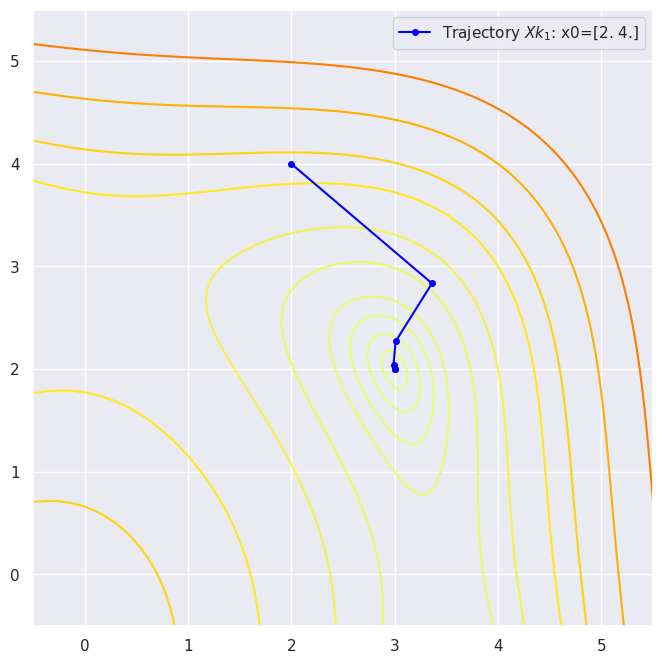

In [22]:
max_iter = 1000
x0 = np.array([2.0,4.0])
tol = np.sqrt(len(x0)*np.finfo(float).eps)


k1, xk1, grad_x1, conv1, list_xk1 = newton_method_mod_hess(opti.fncHimmelblau, opti.grad_fncHimmelblau, hess_himmelblau, x0, tol, max_iter) 

print("Himmelblau function\n")

print("Valor inicial x0\t:",x0)
print("Número de iteraciones\t:",k1)
print("xk\t\t\t:",xk1)
print("f(xk)\t\t\t:",opti.fncHimmelblau(xk1))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x1))
print("Convergencia\t\t:",conv1)

opti.contornosFnc2D(opti.fncHimmelblau, xleft=-0.5, xright=5.5, ybottom=-0.5, ytop=5.5,
               levels=[0.5,2, 5, 10, 25, 50, 100, 150, 250, 400],list_xk1=list_xk1, )

### Función de Beale
Valor inicial: $\mathbf{x}_0 = (2,3)$  


Beale function

Valor inicial x0	: [2. 3.]
Número de iteraciones	: 118
xk			: [3.00000003 0.50000001]
f(xk)			: 1.5230365115070747e-16
||grad_f(x_k)|| 	: 1.0125069654758285e-08
Convergencia		: True


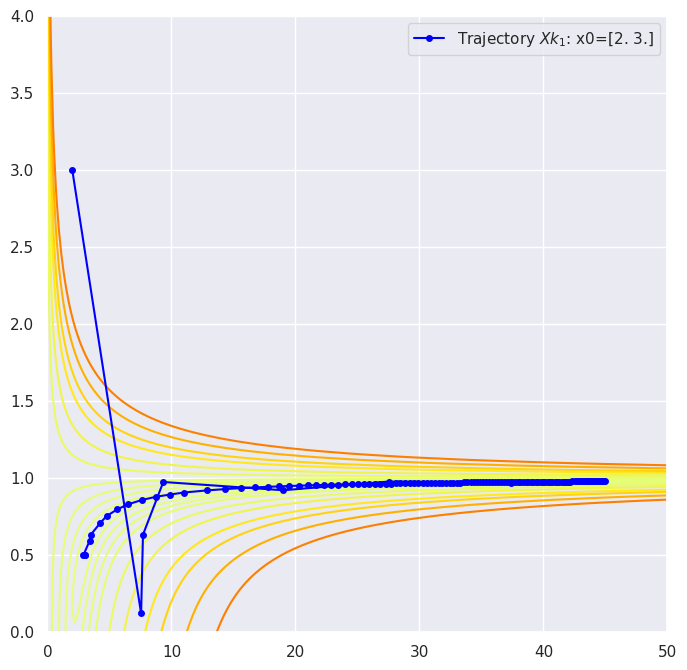

In [23]:
max_iter = 1000
x0 = np.array([2.0,3.0])
tol = np.sqrt(len(x0)*np.finfo(float).eps)


k2, xk2, grad_x2, conv2, list_xk2 = newton_method_mod_hess(opti.fncBeale, opti.grad_fncBeale, hess_beale, x0, tol, max_iter) 

print("Beale function\n")

print("Valor inicial x0\t:",x0)
print("Número de iteraciones\t:",k2)
print("xk\t\t\t:",xk2)
print("f(xk)\t\t\t:",opti.fncBeale(xk2))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x2))
print("Convergencia\t\t:",conv2)

opti.contornosFnc2D(opti.fncBeale, xleft=0, xright=50, ybottom=0, ytop=4,
               levels=[0.5,2, 5, 10, 25, 50, 100, 150, 250, 400],list_xk1=list_xk2, )

### Función de Rosenbrock:
Valores iniciales:
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{10}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{20}$ 


Rosenbrock function

Valor inicial x0	: [-1.2  1. ]
Número de iteraciones	: 21
xk			: [1. 1.]
f(xk)			: 7.682025128905186e-24
||grad_f(x_k)|| 	: 1.216666330197071e-10
Convergencia		: True


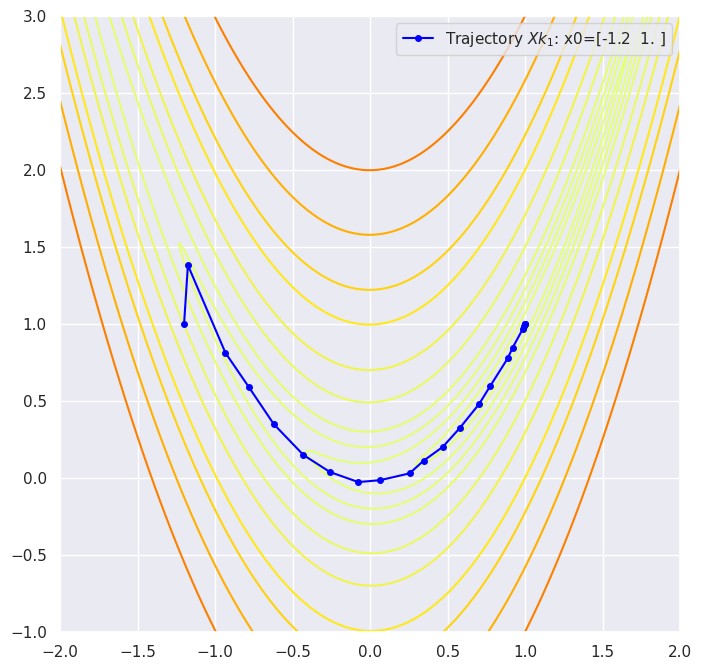

In [24]:
max_iter = 1000
x0 = np.array([-1.2,1.0])
tol = np.sqrt(len(x0)*np.finfo(float).eps)

k3, xk3, grad_x3, conv3, list_xk3 = newton_method_mod_hess(opti.fncRosenbrock, opti.grad_fncRosenbrock, hess_Rosenbrock, x0, tol, max_iter) 

print("Rosenbrock function\n")

print("Valor inicial x0\t:",x0)
print("Número de iteraciones\t:",k3)
print("xk\t\t\t:",xk3)
print("f(xk)\t\t\t:",opti.fncRosenbrock(xk3))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x3))
print("Convergencia\t\t:",conv3)

opti.contornosFnc2D(opti.fncRosenbrock, xleft=-2, xright=2, ybottom=-1, ytop=3,
               levels=[0.5,2, 5, 10, 25, 50, 100, 150, 250, 400],list_xk1=list_xk3, )

In [25]:
max_iter = 1000
x0 = np.array([-1.2,1.0]*5)
tol = np.sqrt(len(x0)*np.finfo(float).eps)


k4, xk4, grad_x4, conv4, list_xk4 = newton_method_mod_hess(opti.fncRosenbrock, opti.grad_fncRosenbrock, hess_Rosenbrock, x0, tol, max_iter) 

print("Rosenbrock function\n")

print("Valor inicial x0\t:",x0)
print("Número de iteraciones\t:",k4)
print("xk\t\t\t:",xk4)
print("f(xk)\t\t\t:",opti.fncRosenbrock(xk4))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x4))
print("Convergencia\t\t:",conv4)

max_iter = 1000
x0 = np.array([-1.2,1.0]*10)
tol = np.sqrt(len(x0)*np.finfo(float).eps)
k5, xk5, grad_x5, conv5, list_xk5 = newton_method_mod_hess(opti.fncRosenbrock, opti.grad_fncRosenbrock, hess_Rosenbrock, x0, tol, max_iter)

print("\n\nValor inicial x0\t:",x0)
print("Número de iteraciones\t:",k5)
print("xk\t\t\t:",xk5)
print("f(xk)\t\t\t:",opti.fncRosenbrock(xk5))  
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x5))
print("Convergencia\t\t:",conv5)

Rosenbrock function

Valor inicial x0	: [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ]
Número de iteraciones	: 26
xk			: [-0.99326337  0.99660604  0.99824061  0.99898843  0.99922615  0.99907365
  0.99845418  0.99705625  0.99417938  0.98839263]
f(xk)			: 3.986579112347138
||grad_f(x_k)|| 	: 8.652220687362887e-13
Convergencia		: True


Valor inicial x0	: [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1. ]
Número de iteraciones	: 41
xk			: [-0.9932861   0.99665107  0.99833032  0.99916774  0.9995852   0.99979328
  0.99989698  0.99994866  0.99997441  0.99998724  0.99999363  0.99999679
  0.99999834  0.99999905  0.99999927  0.99999913  0.99999855  0.99999724
  0.99999453  0.99998905]
f(xk)			: 3.9866238542611967
||grad_f(x_k)|| 	: 1.5201775839241605e-09
Convergencia		: True


### Función de Hartmann de dimensión 6
Valor inicial: $\mathbf{x}_0 = (0,0,0,0,0,0)$ 


In [26]:
max_iter = 1000
x0 = np.zeros(6)
tol = np.sqrt(len(x0)*np.finfo(float).eps)

k6, xk6, grad_x6, conv6, list_xk6 = newton_method_mod_hess(fncHartmann, grad_fncHartmann, hess_Hartmann, x0, tol, max_iter)

print("Hartmann function\n")

print("Valor inicial x0\t:",x0)
print("Número de iteraciones\t:",k6)
print("xk\t\t\t:",xk6)
print("f(xk)\t\t\t:",fncHartmann(xk6))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x6))
print("Convergencia\t\t:",conv6)

Hartmann function

Valor inicial x0	: [0. 0. 0. 0. 0. 0.]
Número de iteraciones	: 6
xk			: [0.20168951 0.15001069 0.47687397 0.27533243 0.31165162 0.65730053]
f(xk)			: -3.042457737843049
||grad_f(x_k)|| 	: 1.8391668274052907e-14
Convergencia		: True


3. ¿Hay alguna ventaja de este algoritmo comparado con los implementados
   en los ejercicios 1 y 2, o basta con usar alguno de los anteriores?

En los experimentos realizados se observa

- No hay mejoras en la búsqueda del óptimo de Himmelbau,
la posible razón es que en la región donde la sucesión de la
función es convexa, lo que hace que los tres algoritmos se comporten
como el método de Newton puro.
- El tercer método que modifica la Hessiana presenta un mejor 
rendimiento al evitar dirigirse al punto de silla,
llega al mínimo de la función a comparación de los otros dos. 
La modificación  de la dirección de descenso en el algoritmo 2 no 
logra escapar del punto de silla de la función, sigue un comportamiento
contraintuitivo.
- Los algoritmos dos y tres presentan un comportamiento más robusto en Rosenbrock de dimensión 2 en 
los pasos dados del algoritmo apesar de tener que hacer más iteraciones
que Newton exacto. 
  En cuanto a Rosenbrock de dimensión 10 y 20, el algoritmo 3 empeora el rendimiento ya que no llega al 
mínimo a diferencia de los otros dos métodos.

- En cuanto a la función de Hartmann de dimensión 6, el algoritmo si presenta un mejor rendimiento en cuanto a los 
otros dos métodos, ya que en Newton puro no converge y en Newton amortiguado si converge pero en más iteraciones, no es
realmente significativo porque solo son 3 iteraciones.

En conclusión, el algoritmo 3 no presenta un rendimiento notablemente mejor que los otros dos.